In [1]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel('HR_Employee_Attrition_Dataset.xlsx')

df_temp=df.copy()


In [8]:
df_temp.dtypes

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [6]:
df_temp['StandardHours'].isna

<bound method Series.isna of 0       80
1       80
2       80
3       80
4       80
        ..
2935    80
2936    80
2937    80
2938    80
2939    80
Name: StandardHours, Length: 2940, dtype: int64>

In [7]:
df_temp.isna().sum()
#df_temp = df_temp.fillna(df.median())

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
df_temp.drop(['EmployeeNumber'], axis=1,inplace=True)

## WE ARE DROPPING  EmployeeNumber COLUMN 

In [10]:
pd.crosstab(df['Attrition'],df['DailyRate'])

DailyRate,102,103,104,105,106,107,109,111,115,116,...,1480,1482,1485,1488,1490,1492,1495,1496,1498,1499
Attrition,,,,,,,,,,,,,,,,,,,,,
No,2,0,0,2,2,2,0,6,0,4,...,4,2,4,2,8,2,6,2,2,2
Yes,0,2,2,0,0,0,2,0,2,0,...,0,0,2,0,0,0,0,2,0,0


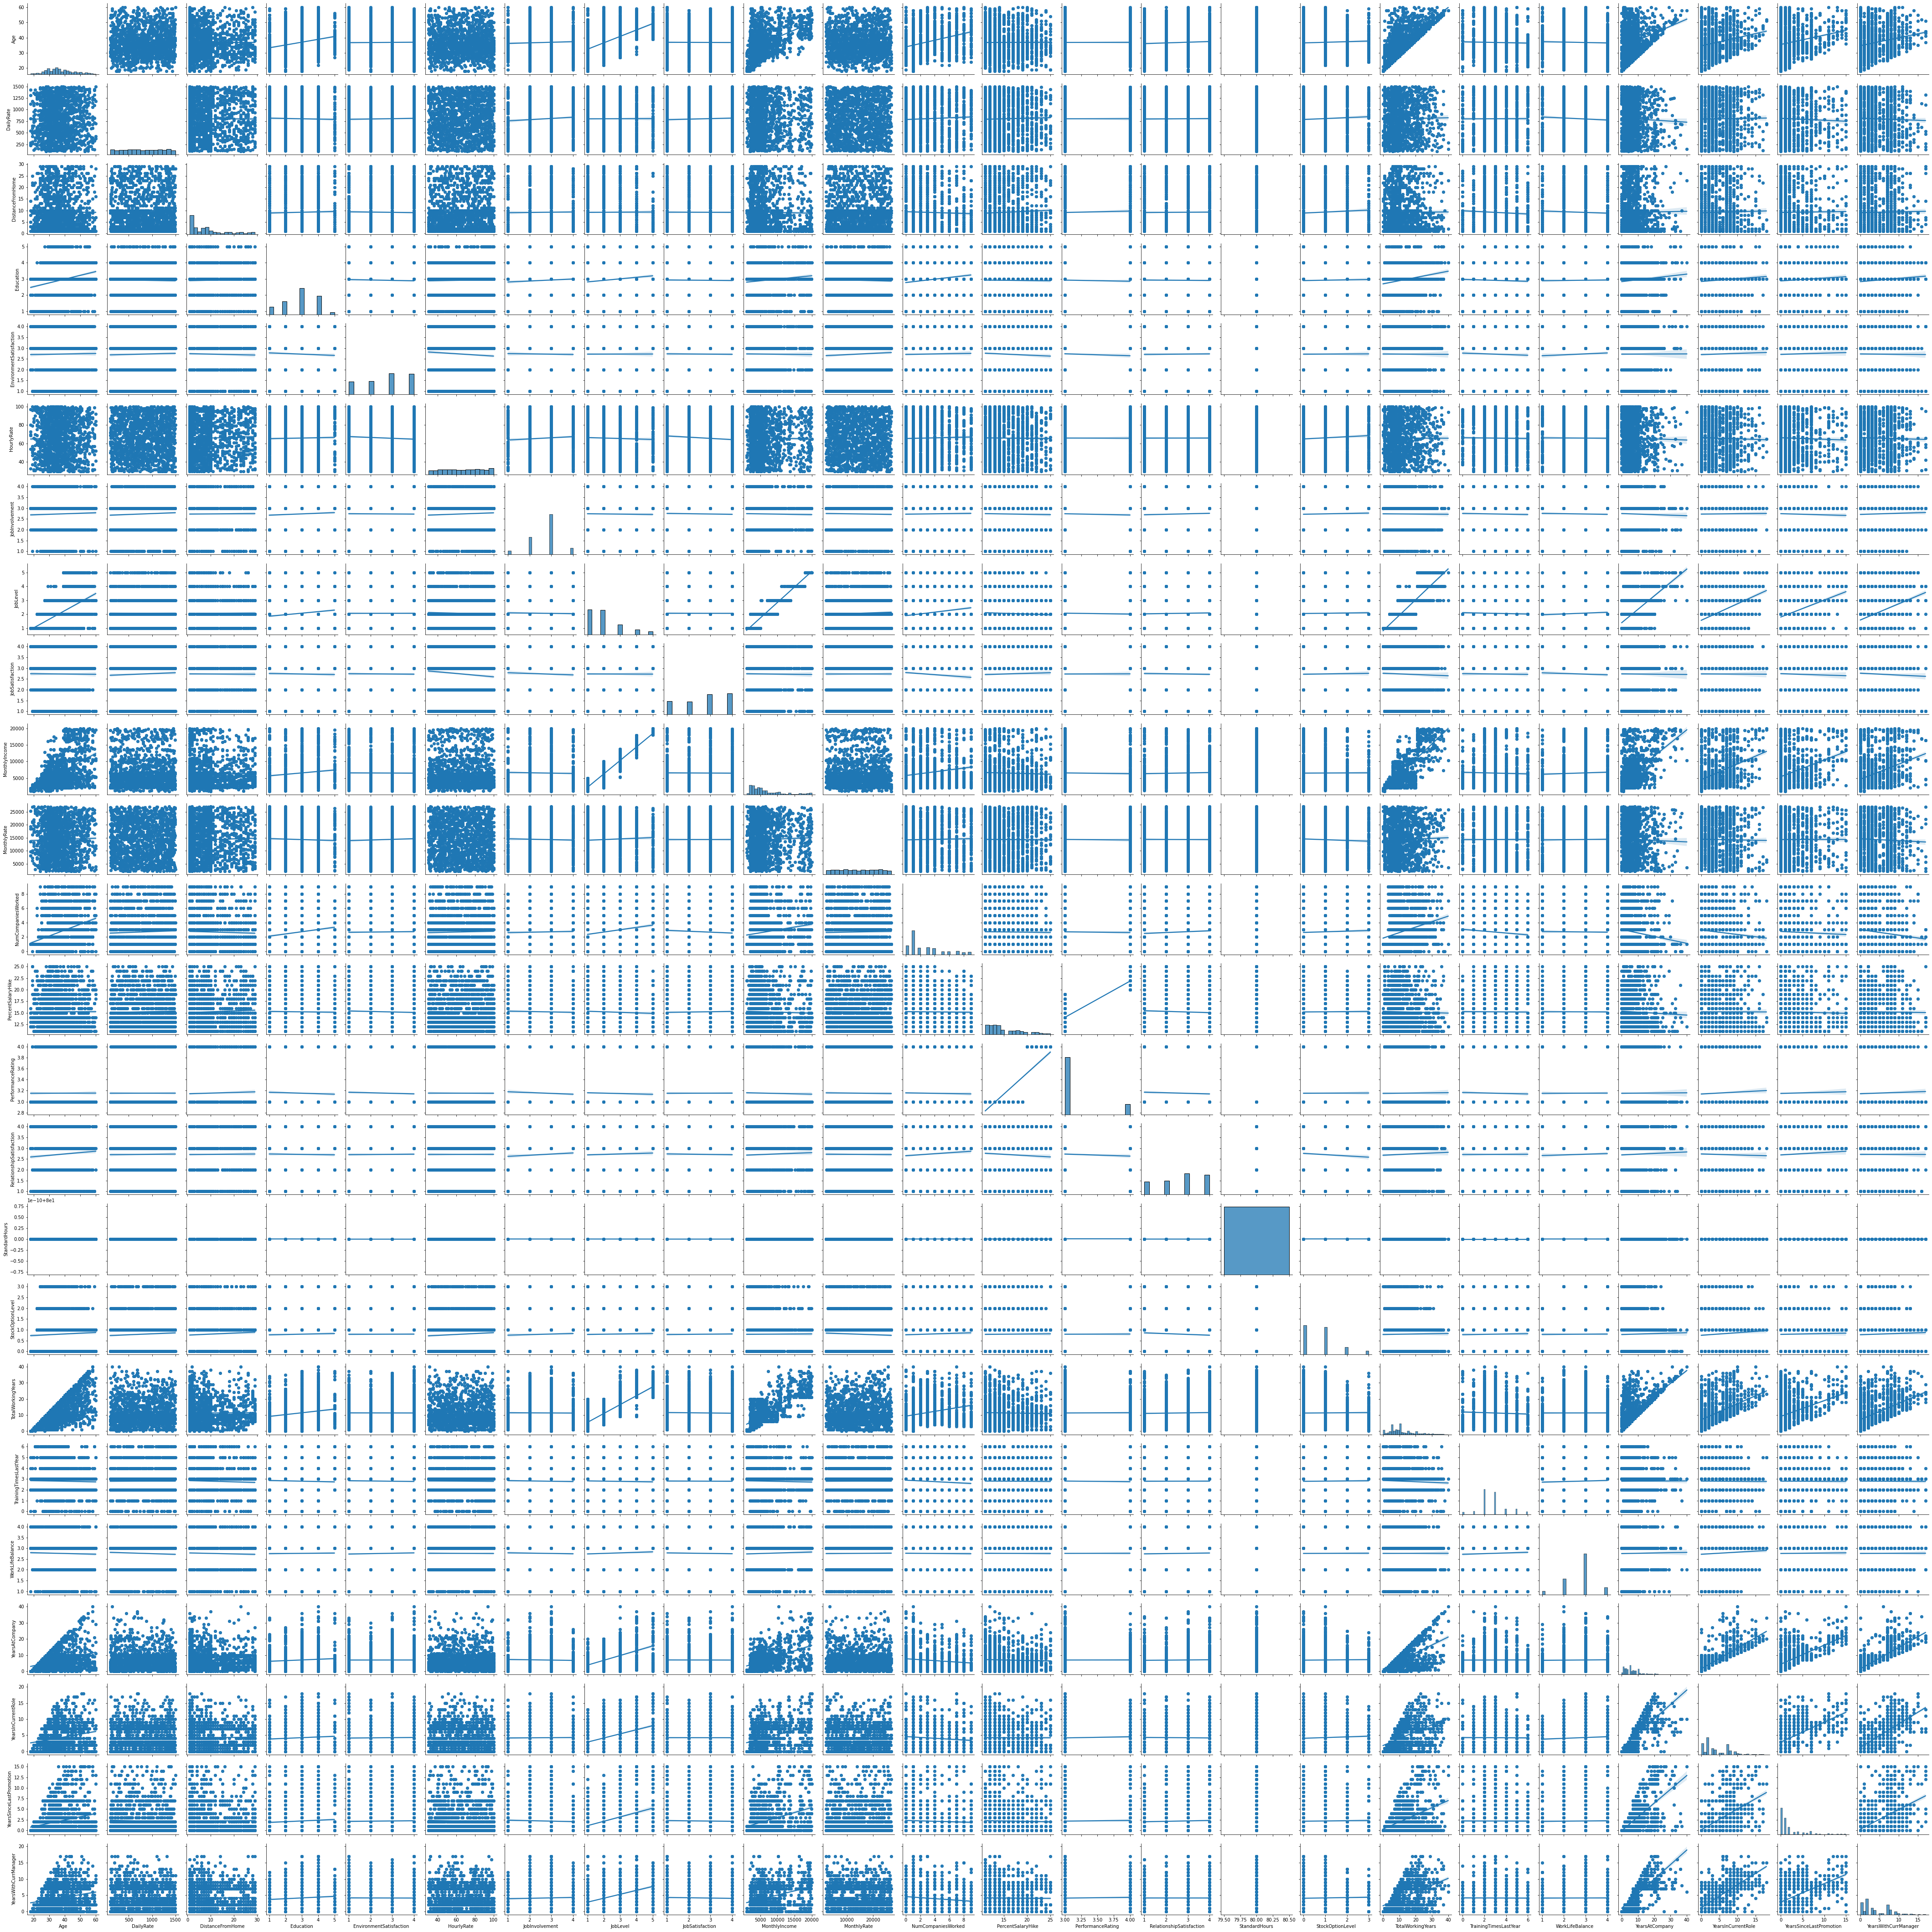

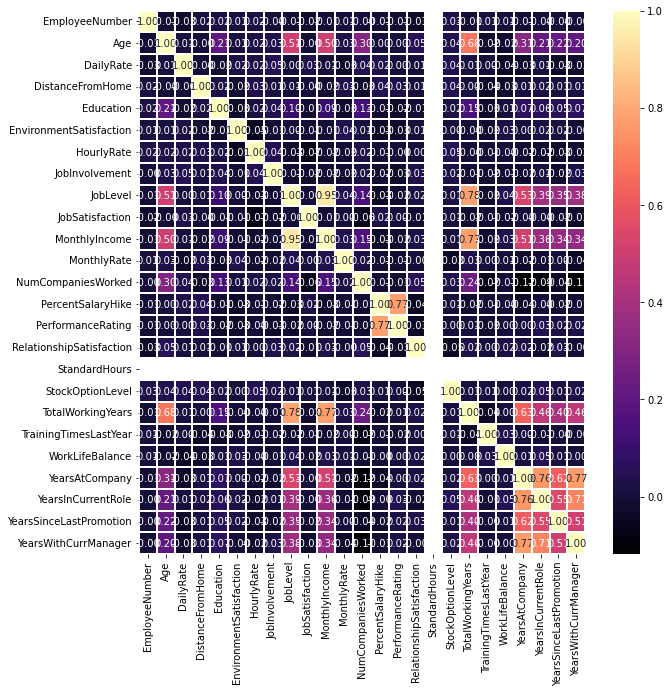

In [11]:
import seaborn as sns

sns.pairplot(df_temp, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()


fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()


In [40]:
###DIRECt TCORRRELATION BETWEEN job level and Monthly income wrt Total working hours
###Salry hike and Performance rating are DIRECTLY CORRELATED
###NEAGTIVE CORREATIONS BETWEEN AGE and years with current manager, years sincce last promotion,
###, years with current manger
### Job level and Monthly income also have NEGATIVE correlation between
###years with current manager, years sincce last promotion, years with current manger 

In [53]:
df_temp

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,...,4,80,0,17,3,2,9,6,0,8


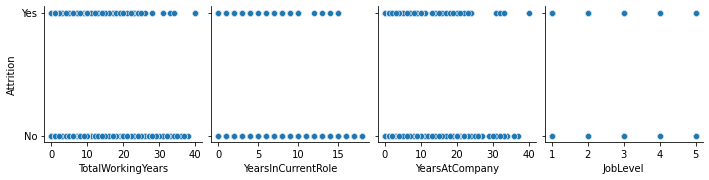

In [51]:
sns.pairplot(df_temp, y_vars='Attrition', x_vars=['TotalWorkingYears','YearsInCurrentRole','YearsAtCompany','JobLevel'])

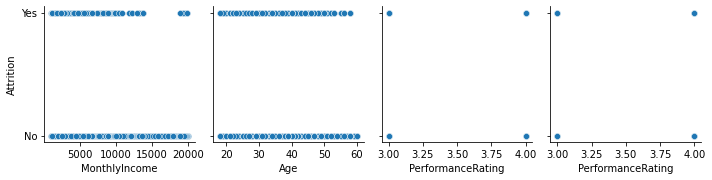

In [52]:
sns.pairplot(df_temp, y_vars='Attrition', x_vars=['MonthlyIncome','Age','PerformanceRating','PerformanceRating'])

In [14]:
df_temp = pd.get_dummies(df_temp, columns=['BusinessTravel','Department','EducationField','JobRole','Gender','MaritalStatus','OverTime','Over18'])

In [15]:
df_temp

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y
0,Yes,41,1102,1,2,2,94,3,2,4,...,1,0,1,0,0,0,1,0,1,1
1,No,49,279,8,1,3,61,2,2,2,...,0,0,0,1,0,1,0,1,0,1
2,Yes,37,1373,2,2,4,92,2,1,3,...,0,0,0,1,0,0,1,0,1,1
3,No,33,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,1,0,0,1,1
4,No,27,591,2,1,1,40,3,1,2,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,No,36,884,23,2,3,41,4,2,4,...,0,0,0,1,0,1,0,1,0,1
2936,No,39,613,6,1,4,42,2,3,1,...,0,0,0,1,0,1,0,1,0,1
2937,No,27,155,4,3,2,87,4,2,2,...,0,0,0,1,0,1,0,0,1,1
2938,No,49,1023,2,3,4,63,2,2,2,...,1,0,0,1,0,1,0,1,0,1


In [16]:
df_temp['Attrition'] = df_temp['Attrition'].map({'Yes': 1, 'No': 0})

In [17]:
df_temp

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y
0,1,41,1102,1,2,2,94,3,2,4,...,1,0,1,0,0,0,1,0,1,1
1,0,49,279,8,1,3,61,2,2,2,...,0,0,0,1,0,1,0,1,0,1
2,1,37,1373,2,2,4,92,2,1,3,...,0,0,0,1,0,0,1,0,1,1
3,0,33,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,1,0,0,1,1
4,0,27,591,2,1,1,40,3,1,2,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,36,884,23,2,3,41,4,2,4,...,0,0,0,1,0,1,0,1,0,1
2936,0,39,613,6,1,4,42,2,3,1,...,0,0,0,1,0,1,0,1,0,1
2937,0,27,155,4,3,2,87,4,2,2,...,0,0,0,1,0,1,0,0,1,1
2938,0,49,1023,2,3,4,63,2,2,2,...,1,0,0,1,0,1,0,1,0,1


In [18]:
X = df_temp.drop(labels= "Attrition" , axis = 1)
y = df_temp["Attrition"]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [19]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.034852 -0.000115  0.033571  0.057783 -0.365274  0.002469 -0.411257   

         7         8       9  ...        44        45        46        47  \
0 -0.08955 -0.369574 -0.0001  ...  0.149706 -0.108004  0.108832 -0.198153   

         48        49        50        51        52  intercept  
0 -0.168387  0.367368 -0.731901  0.732729  0.000828   0.000828  

[1 rows x 54 columns]


In [20]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8888888888888888


<AxesSubplot:>

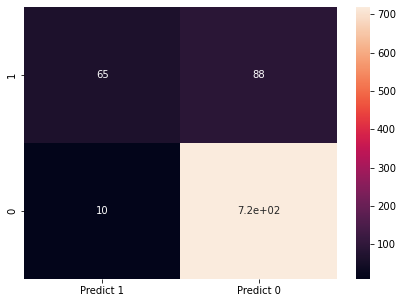

In [112]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
###NOW WE ARE GOING TO SHOW THE SAME USING  KNN TECHNIQUE

In [21]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


NNH.fit(X_train, y_train)


predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

print("\nKNN SEEMS TO GIVE MORE ACCURACY\n")


KNN SEEMS TO GIVE MORE ACCURACY



Confusion Matrix


<AxesSubplot:>

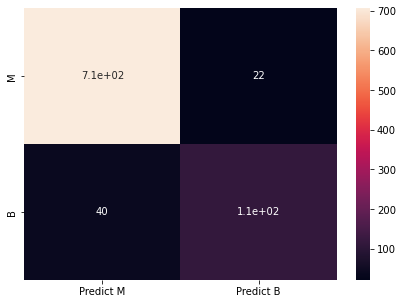

In [22]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["M","B"]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


n
KNN OF 14/15 AND 24/25 HAVE GOOD VALUES




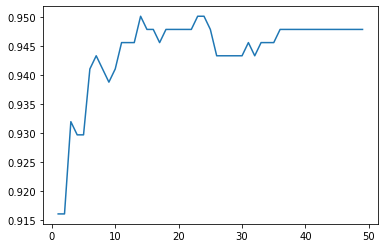

In [25]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))
print("n\nKNN OF 14/15 AND 24/25 HAVE GOOD VALUES\n\n")
plt.plot(range(1,50),scores)

